In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import portafolio.
expert1 = pd.read_csv("dataset/expert_4321_data.csv")
expert2 = pd.read_csv("dataset/expert_4376_data.csv")
expert3 = pd.read_csv("dataset/expert_5874_data.csv")

In [3]:
get_balance = lambda data: data[data.direction == "out"]["balance"].to_frame()
exp1 = get_balance(expert1)
exp2 = get_balance(expert2)
exp3 = get_balance(expert3)


In [4]:
robots = pd.concat([exp1, exp2, exp3], axis = 1)
robots.columns = ["Daily Balance 1", "Daily Balance 2", "Daily Balance 3"]
robots.fillna(robots.mean(), inplace=True)

In [5]:
robots.tail()

,Daily Balance 1,Daily Balance 2,Daily Balance 3
497,5047.472029,5303.47,4253.112727
499,5047.472029,5300.82,4253.112727
501,5047.472029,5297.79,4253.112727
503,5047.472029,5295.50,4253.112727
505,5047.472029,5294.87,4253.112727


In [6]:
mean_daily_returns = robots.pct_change(1).mean()
mean_daily_returns

Daily Balance 1    0.000038
Daily Balance 2    0.000242
Daily Balance 3   -0.000534
dtype: float64

In [7]:
robots.pct_change(1).corr()

,Daily Balance 1,Daily Balance 2,Daily Balance 3
Daily Balance 1,1.000000,0.027011,-0.052099
Daily Balance 2,0.027011,1.000000,0.014433
Daily Balance 3,-0.052099,0.014433,1.000000


In [46]:
robots.pct_change(1).corr() ** 2

,Daily Balance 1,Daily Balance 2,Daily Balance 3
Daily Balance 1,1.000000,0.000730,0.002714
Daily Balance 2,0.000730,1.000000,0.000208
Daily Balance 3,0.002714,0.000208,1.000000


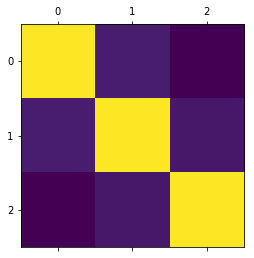

In [8]:
corrs = robots.pct_change(1).corr()
plt.matshow(corrs)

In [9]:
# Simulating thousand of possible allocations.
robots.head()

,Daily Balance 1,Daily Balance 2,Daily Balance 3
1,5000.22,4995.68,4913.16
3,5002.55,4995.44,4629.66
5,5002.69,5073.76,4644.86
7,5003.07,5067.55,4650.46
9,5006.53,5273.85,4664.19


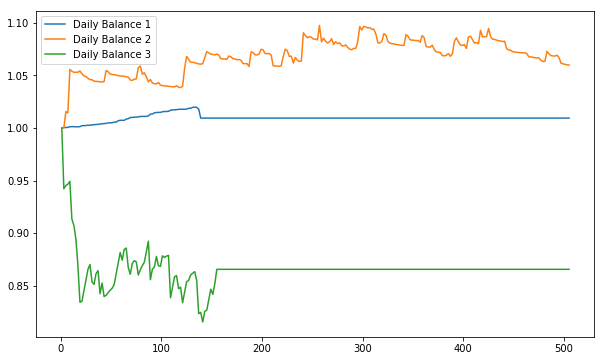

In [10]:
robots_normed = robots / robots.iloc[0]
robots_normed.plot(figsize=(10,6))

In [11]:
# Log Returns vs Arithmetic Returns.

In [12]:
log_ret = np.log(robots / robots.shift(1))
log_ret.columns = ["Daily Returns Robot 1", "Daily Returns Robot 2", "Daily Returns Robot 3"]
log_ret.head()

,Daily Returns Robot 1,Daily Returns Robot 2,Daily Returns Robot 3
1,NaN,NaN,NaN
3,0.000466,-0.000048,-0.059434
5,0.000028,0.015557,0.003278
7,0.000076,-0.001225,0.001205
9,0.000691,0.039903,0.002948


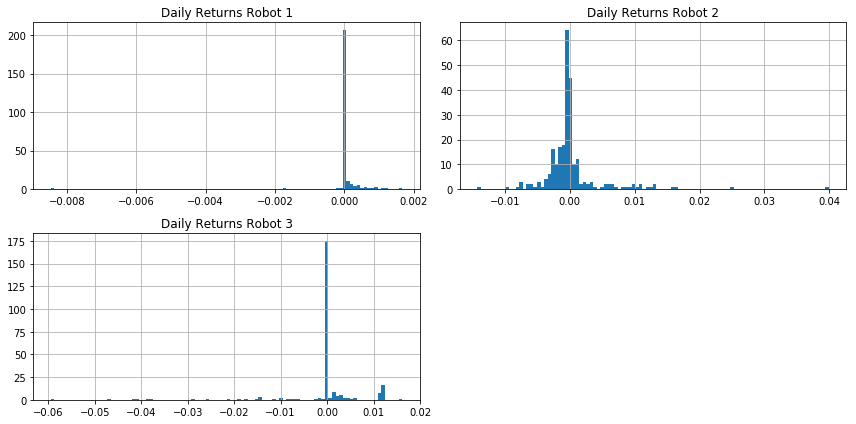

In [13]:
log_ret.hist(bins = 100, figsize = (12, 6))
plt.tight_layout()

In [14]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Returns Robot 1,252.0,0.000037,0.000597,-0.008465,0.000000,0.000000,0.000006,0.001675
Daily Returns Robot 2,252.0,0.000231,0.004743,-0.014251,-0.001446,-0.000293,0.000220,0.039903
Daily Returns Robot 3,252.0,-0.000572,0.008854,-0.059434,0.000000,0.000000,0.000000,0.016183


In [15]:
# Expected annual return in percentage.
log_ret.mean() * 252 * 100

Daily Returns Robot 1     0.940562
Daily Returns Robot 2     5.816489
Daily Returns Robot 3   -14.426620
dtype: float64

In [16]:
log_ret.cov()

,Daily Returns Robot 1,Daily Returns Robot 2,Daily Returns Robot 3
Daily Returns Robot 1,3.566530e-07,7.503981e-08,-2.810377e-07
Daily Returns Robot 2,7.503981e-08,2.249838e-05,5.738756e-07
Daily Returns Robot 3,-2.810377e-07,5.738756e-07,7.839462e-05


In [17]:
log_ret.cov() * 252 # multiply by days

,Daily Returns Robot 1,Daily Returns Robot 2,Daily Returns Robot 3
Daily Returns Robot 1,0.000090,0.000019,-0.000071
Daily Returns Robot 2,0.000019,0.005670,0.000145
Daily Returns Robot 3,-0.000071,0.000145,0.019755


In [18]:
# Single run for some random allocation.

In [19]:
# Set seed (optional)
np.random.seed(101)

# Columns names.
print("Robots")
print(robots.columns)
print('\n')

# Create Random Weights.
print("Creating Random Weights")
weights = np.array(np.random.random(3))
print(weights)
print('\n')

# Rebalance Weights
print("Rebalance to sum to 1.0")
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return.
print("Expected Portfolio Return")
exp_ret = np.sum(log_ret.mean() * weights) * 252
print(exp_ret)
print('\n')

# Expected Standard Deviation.
print("Expected Volatility")
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio.
SR = exp_ret / exp_vol
print("Sharpe Ratio")
print(SR)

Robots
Index(['Daily Balance 1', 'Daily Balance 2', 'Daily Balance 3'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423]


Rebalance to sum to 1.0
[0.46291341 0.51156154 0.02552505]


Expected Portfolio Return
0.03042650461124837


Expected Volatility
0.03907550640182475


Sharpe Ratio
0.7786592526367748


In [20]:
num_ports = 15000
all_weights = np.zeros((num_ports, len(robots.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    
    # Create Random Weights.
    weights = np.array(np.random.random(3))
    
    # Rebalance Weights.
    weights = weights / np.sum(weights)
    
    # Save Weights.
    all_weights[ind, :] = weights
    
    # Expected Return.
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    
    # Expected Variance.
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    
    # Sharpe Ratio.
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind] 

In [21]:
sharpe_arr.max()

1.2312274677820885

In [22]:
index = sharpe_arr.argmax()
index

725

In [23]:
all_weights[index, :]

array([8.98426351e-01, 1.00983352e-01, 5.90297739e-04])

In [24]:
max_sr_ret = ret_arr[index]
max_sr_vol = vol_arr[index]

print(max_sr_ret, max_sr_vol)

0.014238780559711726 0.011564703462440791


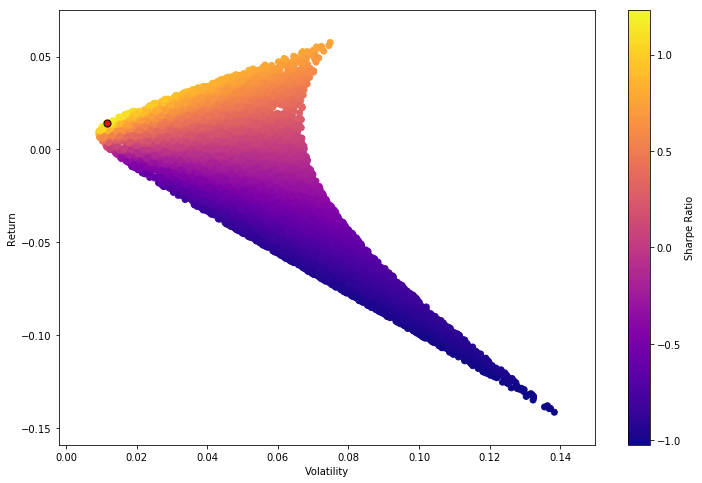

In [25]:
plt.figure(figsize = (12, 8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = "plasma")
plt.colorbar(label = "Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

# Add red dot for max SR.
plt.scatter(max_sr_vol, max_sr_ret, c= "red", s = 50, edgecolors="black")

In [26]:
# Mathematical Optimization
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [27]:
from scipy.optimize import minimize

In [28]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [29]:
# Contraints.
def check_sum(weights):
    return np.sum(weights) - 1

In [30]:
# By convention of minimize function it should be a function that returns zero for conditions.
cons = ({"type": "eq", "fun": check_sum})

In [31]:
# 0-1 bounds for each weight.
bounds = ((0,1), (0,1), (0,1))

In [32]:
# Initial GUess (equal distribution.)
init_guess = [0.25, 0.25, 0.25]

In [33]:
# Sequential Least Squares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [34]:
opt_results.x

array([9.11831811e-01, 8.81681888e-02, 1.03530193e-13])

In [35]:
get_ret_vol_sr(opt_results.x)

array([0.01370463, 0.01103814, 1.24157095])

In [36]:
# All Optiminal Portfolios (Efficient Frontier).

In [37]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on.
frontier_y = np.linspace(0, 0.3, 100)

In [38]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [39]:
frontier_volatility = []
for possible_return in frontier_y:
    # function for return.
    cons = ({"type": "eq", "fun": check_sum}, 
            {"type": "eq", "fun": lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility, init_guess, method = "SLSQP", bounds = bounds, constraints = cons)
    frontier_volatility.append(result["fun"])

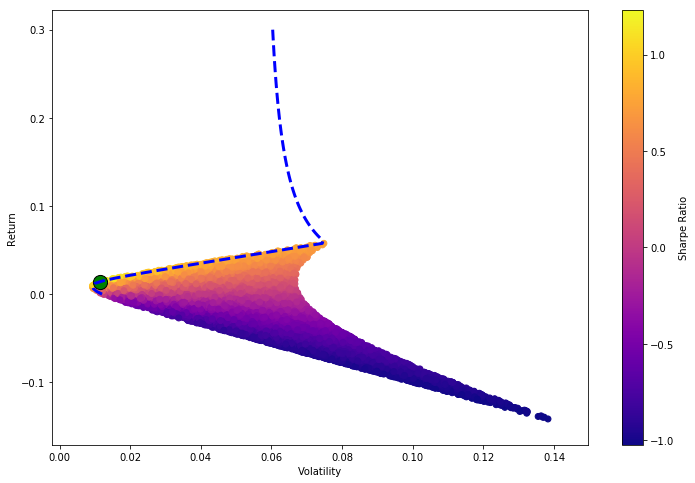

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = "plasma")
plt.colorbar(label = "Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

# Add red dot for max SR.
plt.scatter(max_sr_vol, max_sr_ret, c= "green", s = 200, edgecolors="black")

# Add frontier line.
plt.plot(frontier_volatility, frontier_y, "b--", linewidth=3)

In [41]:
opt_results.x

array([9.11831811e-01, 8.81681888e-02, 1.03530193e-13])

In [42]:
money = 3000
stop_loss_pips = [20, 30, 10]
count = 0

for w in opt_results.x:
    print("")
    print("Expert ", count + 1)
    print("Allocation results: ", opt_results.x)
    
    investment = round(w * money, 4)
    print("Investment in dlls: ", investment)
    
    risk = investment * 0.02
    print("Risk 2% in dlls: ", risk)
    
    lots = risk / (stop_loss_pips[count] * 10)
    print("Lot Size per Trade ", lots)
    
    count += 1


Expert  1
Allocation results:  [9.11831811e-01 8.81681888e-02 1.03530193e-13]
Investment in dlls:  2735.4954
Risk 2% in dlls:  54.709908
Lot Size per Trade  0.27354954

Expert  2
Allocation results:  [9.11831811e-01 8.81681888e-02 1.03530193e-13]
Investment in dlls:  264.5046
Risk 2% in dlls:  5.290092
Lot Size per Trade  0.01763364

Expert  3
Allocation results:  [9.11831811e-01 8.81681888e-02 1.03530193e-13]
Investment in dlls:  0.0
Risk 2% in dlls:  0.0
Lot Size per Trade  0.0


In [ ]:
# Send results to MQL5 and change lot size per strategy.
